# Coding Block 4 - Automated model and hyperparameter tuning with AutoGluon

### Load the packages

In [10]:
#!pip install autogluon.tabular  > /dev/null 2>&1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# AutoML
from autogluon.tabular import TabularPredictor
from sklearn.preprocessing import MinMaxScaler
'''
...
'''

'\n...\n'

### Read the dataset 
You can also compare processed and non-processed data. The autogluon library will do some preprocessing as well.

In [11]:
df = pd.read_csv('../data/df_imputed_clean.csv')
df = df.drop(columns=['Mahalanobis_Distance', 'Multivariate_Outlier', 'Outlier', 'Unnamed: 0'])



# Define target variable
target = 'Outcome'

# Separate features and target
X = df.drop(columns=[target])
y = df[target]

# Normalize numerical features
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

df_scaled = X_scaled.copy()
df_scaled[target] = y

df_old = pd.read_csv('../data/diabetes.csv')

### Use the Autogluon library
Use the library autogluon for automated hyperparametertuning and model benchmarking. The fit function of the TabularPredictor object allows for setting the option: <br>
<i>presets = {‘best_quality’, ‘high_quality’, ‘good_quality’, ‘medium_quality’, ‘experimental_quality’, ‘optimize_for_deployment’, ‘interpretable’, ‘ignore_text’}</i> <br>

medium_quality can limit the depths of hyperparameter optimization..

No path specified. Models will be saved in: "AutogluonModels/ag-20250320_134031"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.9.21
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.2.0: Fri Dec  6 19:01:59 PST 2024; root:xnu-11215.61.5~2/RELEASE_ARM64_T6000
CPU Count:          8
Memory Avail:       4.03 GB / 16.00 GB (25.2%)
Disk Space Avail:   14.91 GB / 460.43 GB (3.2%)
Presets specified: ['medium_quality']
Beginning AutoGluon training ...
AutoGluon will save models to "/Users/chrisoesterreich/Desktop/AppliedAnalytics/Applied-Analytics/04_Thursday/AutogluonModels/ag-20250320_134031"
Train Data Rows:    614
Train Data Columns: 8
Label Column:       Outcome
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually spec

Leaderboard for Original (df_old):
                  model  score_test  score_val eval_metric  pred_time_test  \
0            LightGBMXT    0.766234   0.772358    accuracy        0.001808   
1         LightGBMLarge    0.746753   0.764228    accuracy        0.006775   
2        ExtraTreesGini    0.746753   0.723577    accuracy        0.031639   
3      RandomForestGini    0.740260   0.739837    accuracy        0.032000   
4      RandomForestEntr    0.733766   0.731707    accuracy        0.029872   
5              LightGBM    0.727273   0.780488    accuracy        0.001056   
6   WeightedEnsemble_L2    0.727273   0.780488    accuracy        0.002015   
7               XGBoost    0.727273   0.723577    accuracy        0.004350   
8        ExtraTreesEntr    0.727273   0.731707    accuracy        0.031458   
9        KNeighborsDist    0.688312   0.674797    accuracy        0.012596   
10       KNeighborsUnif    0.688312   0.682927    accuracy        0.014217   

    pred_time_val  fit_time 

	0.7949	 = Validation score   (accuracy)
	0.18s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: LightGBM ...
	0.7949	 = Validation score   (accuracy)
	0.67s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: RandomForestGini ...
	0.7607	 = Validation score   (accuracy)
	0.26s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: RandomForestEntr ...
	0.7607	 = Validation score   (accuracy)
	0.26s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: CatBoost ...
		`import catboost` failed. A quick tip is to install via `pip install autogluon.tabular[catboost]==1.2`.
Fitting model: ExtraTreesGini ...
	0.7607	 = Validation score   (accuracy)
	0.25s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: ExtraTreesEntr ...
	0.7265	 = Validation score   (accuracy)
	0.25s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
		Import fastai failed. A quick tip is to install via `pip install auto

Leaderboard for Cleaned (df):
                  model  score_test  score_val eval_metric  pred_time_test  \
0               XGBoost    0.760274   0.794872    accuracy        0.004746   
1            LightGBMXT    0.746575   0.794872    accuracy        0.000796   
2   WeightedEnsemble_L2    0.746575   0.794872    accuracy        0.001579   
3        ExtraTreesGini    0.739726   0.760684    accuracy        0.031515   
4      RandomForestGini    0.732877   0.760684    accuracy        0.029638   
5        ExtraTreesEntr    0.732877   0.726496    accuracy        0.033137   
6      RandomForestEntr    0.726027   0.760684    accuracy        0.031801   
7        KNeighborsUnif    0.712329   0.786325    accuracy        0.015975   
8         LightGBMLarge    0.705479   0.769231    accuracy        0.004171   
9        KNeighborsDist    0.705479   0.786325    accuracy        0.013988   
10             LightGBM    0.657534   0.794872    accuracy        0.005941   

    pred_time_val  fit_time  pred

	0.7778	 = Validation score   (accuracy)
	0.15s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: LightGBM ...
	0.8291	 = Validation score   (accuracy)
	0.6s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: RandomForestGini ...
	0.7607	 = Validation score   (accuracy)
	0.27s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: RandomForestEntr ...
	0.7692	 = Validation score   (accuracy)
	0.27s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: CatBoost ...
		`import catboost` failed. A quick tip is to install via `pip install autogluon.tabular[catboost]==1.2`.
Fitting model: ExtraTreesGini ...
	0.7607	 = Validation score   (accuracy)
	0.24s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: ExtraTreesEntr ...
	0.7265	 = Validation score   (accuracy)
	0.26s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
		Import fastai failed. A quick tip is to install via `pip install autog

Leaderboard for Scaled (df_scaled):
                  model  score_test  score_val eval_metric  pred_time_test  \
0               XGBoost    0.767123   0.803419    accuracy        0.004128   
1            LightGBMXT    0.760274   0.777778    accuracy        0.001295   
2        ExtraTreesGini    0.739726   0.760684    accuracy        0.032482   
3      RandomForestGini    0.732877   0.760684    accuracy        0.031673   
4        ExtraTreesEntr    0.732877   0.726496    accuracy        0.032997   
5        KNeighborsUnif    0.726027   0.726496    accuracy        0.013429   
6      RandomForestEntr    0.726027   0.769231    accuracy        0.030899   
7        KNeighborsDist    0.719178   0.726496    accuracy        0.015365   
8         LightGBMLarge    0.691781   0.794872    accuracy        0.010809   
9              LightGBM    0.671233   0.829060    accuracy        0.004065   
10  WeightedEnsemble_L2    0.671233   0.829060    accuracy        0.005285   

    pred_time_val  fit_time

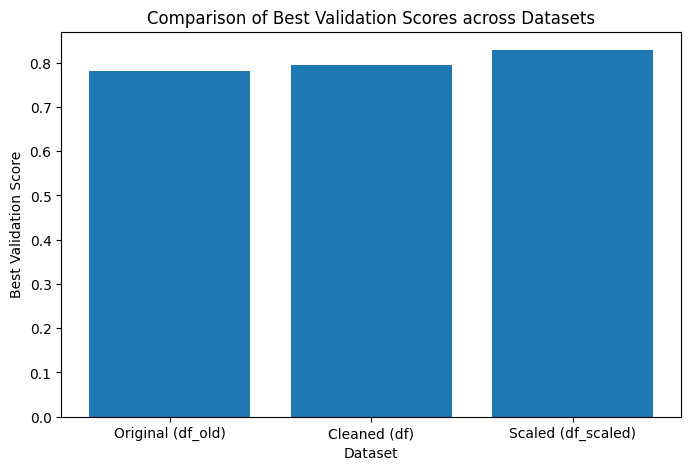


Sample predictions for Cleaned (df):
    Outcome  Predicted
1       0.0        0.0
4       0.0        0.0
13      1.0        0.0
14      0.0        0.0
20      1.0        1.0
21      1.0        0.0
27      1.0        1.0
32      0.0        1.0
34      1.0        0.0
35      1.0        0.0


In [12]:
datasets = {
    'Original (df_old)': df_old,
    'Cleaned (df)': df,
    'Scaled (df_scaled)': df_scaled
}

# 4. ---------------------------
# Train/test split fraction
test_fraction = 0.2

# 5. ---------------------------
# Container to hold leaderboards and predictors
leaderboards = {}
predictors = {}

for name, data in datasets.items():
    # Check that the target exists in the dataset
    if target not in data.columns:
        raise ValueError(f"Target column '{target}' not found in {name}")

    # Create train/test split
    df_train = data.sample(frac=1 - test_fraction, random_state=42)
    df_test = data.drop(df_train.index)

    # Train AutoGluon model
    predictor = TabularPredictor(label=target).fit(
        df_train,
        presets='medium_quality',
        # You can specify eval_metric='accuracy', etc. if you want to force a metric
    )
    
    # Evaluate model performance
    leaderboard = predictor.leaderboard(df_test, silent=True)
    leaderboards[name] = leaderboard
    predictors[name] = predictor

    # Print leaderboard
    print(f"Leaderboard for {name}:")
    print(leaderboard)
    print("----------------------------------------------------\n")

# 6. ---------------------------
# Compare best validation scores across all datasets
best_scores = {}
for name, lb in leaderboards.items():
    # 'score_val' is the default validation score column in AutoGluon
    best_score = lb['score_val'].max()  
    best_scores[name] = best_score

# 7. ---------------------------
# Plot the best validation scores side-by-side
plt.figure(figsize=(8, 5))
plt.bar(best_scores.keys(), best_scores.values())
plt.xlabel('Dataset')
plt.ylabel('Best Validation Score')
plt.title('Comparison of Best Validation Scores across Datasets')
plt.show()

# 8. ---------------------------
# Example of predictions on one of the datasets
# (replace with whichever dataset you want to inspect)
test_name = 'Cleaned (df)'
df_test_pred = datasets[test_name].drop(
    datasets[test_name].sample(frac=1 - test_fraction, random_state=42).index
)
predicted = predictors[test_name].predict(df_test_pred.drop(columns=[target]))

# Show a sample of actual vs. predicted
comparison = df_test_pred[[target]].copy()
comparison['Predicted'] = predicted
print(f"\nSample predictions for {test_name}:")
print(comparison.head(10))

### Show the leaderboard
TabularPredictor objects from Autogluon provide a function "leaderboard"

No path specified. Models will be saved in: "AutogluonModels/ag-20250320_134703"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.9.21
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.2.0: Fri Dec  6 19:01:59 PST 2024; root:xnu-11215.61.5~2/RELEASE_ARM64_T6000
CPU Count:          8
Memory Avail:       4.61 GB / 16.00 GB (28.8%)
Disk Space Avail:   14.68 GB / 460.43 GB (3.2%)
Presets specified: ['medium_quality']
Beginning AutoGluon training ...
AutoGluon will save models to "/Users/chrisoesterreich/Desktop/AppliedAnalytics/Applied-Analytics/04_Thursday/AutogluonModels/ag-20250320_134703"
Train Data Rows:    614
Train Data Columns: 8
Label Column:       Outcome
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually spec

Leaderboard for Original (df_old):
                  model  score_test  score_val eval_metric  pred_time_test  \
0            LightGBMXT    0.766234   0.772358    accuracy        0.001769   
1         LightGBMLarge    0.746753   0.764228    accuracy        0.006335   
2        ExtraTreesGini    0.746753   0.723577    accuracy        0.031677   
3      RandomForestGini    0.740260   0.739837    accuracy        0.030700   
4      RandomForestEntr    0.733766   0.731707    accuracy        0.030822   
5              LightGBM    0.727273   0.780488    accuracy        0.000840   
6   WeightedEnsemble_L2    0.727273   0.780488    accuracy        0.001872   
7               XGBoost    0.727273   0.723577    accuracy        0.004674   
8        ExtraTreesEntr    0.727273   0.731707    accuracy        0.033655   
9        KNeighborsDist    0.688312   0.674797    accuracy        0.014610   
10       KNeighborsUnif    0.688312   0.682927    accuracy        0.014843   

    pred_time_val  fit_time 

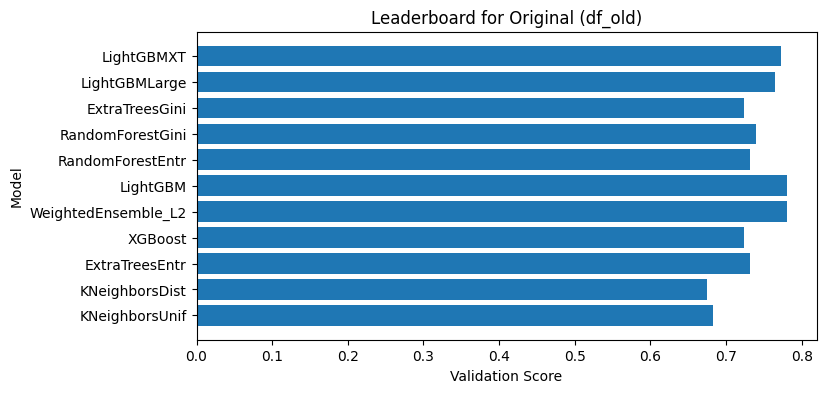

No path specified. Models will be saved in: "AutogluonModels/ag-20250320_134707"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.9.21
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.2.0: Fri Dec  6 19:01:59 PST 2024; root:xnu-11215.61.5~2/RELEASE_ARM64_T6000
CPU Count:          8
Memory Avail:       4.66 GB / 16.00 GB (29.1%)
Disk Space Avail:   14.66 GB / 460.43 GB (3.2%)
Presets specified: ['medium_quality']
Beginning AutoGluon training ...
AutoGluon will save models to "/Users/chrisoesterreich/Desktop/AppliedAnalytics/Applied-Analytics/04_Thursday/AutogluonModels/ag-20250320_134707"
Train Data Rows:    583
Train Data Columns: 8
Label Column:       Outcome
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1.0, 0.0]
	If 'binary' is not the correct problem_type, please manually 

Leaderboard for Cleaned (df_clean):
                  model  score_test  score_val eval_metric  pred_time_test  \
0               XGBoost    0.760274   0.794872    accuracy        0.004154   
1            LightGBMXT    0.746575   0.794872    accuracy        0.000783   
2   WeightedEnsemble_L2    0.746575   0.794872    accuracy        0.001593   
3        ExtraTreesGini    0.739726   0.760684    accuracy        0.033286   
4        ExtraTreesEntr    0.732877   0.726496    accuracy        0.029971   
5      RandomForestGini    0.732877   0.760684    accuracy        0.030175   
6      RandomForestEntr    0.726027   0.760684    accuracy        0.028419   
7        KNeighborsUnif    0.712329   0.786325    accuracy        0.015056   
8         LightGBMLarge    0.705479   0.769231    accuracy        0.004129   
9        KNeighborsDist    0.705479   0.786325    accuracy        0.014678   
10             LightGBM    0.657534   0.794872    accuracy        0.005217   

    pred_time_val  fit_time

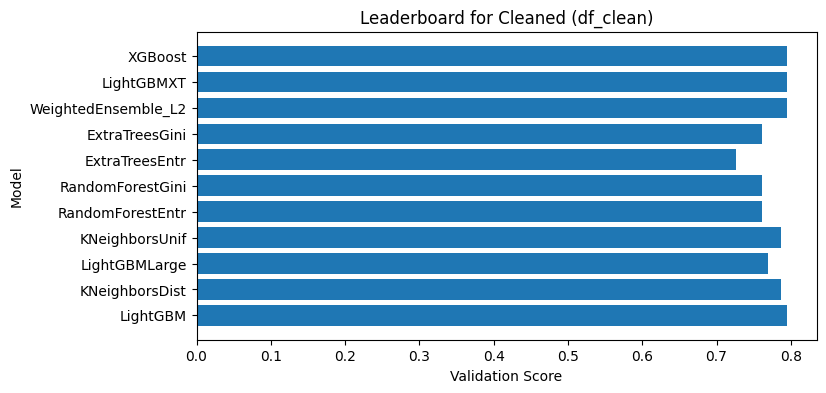

No path specified. Models will be saved in: "AutogluonModels/ag-20250320_134711"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.9.21
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.2.0: Fri Dec  6 19:01:59 PST 2024; root:xnu-11215.61.5~2/RELEASE_ARM64_T6000
CPU Count:          8
Memory Avail:       4.74 GB / 16.00 GB (29.6%)
Disk Space Avail:   14.64 GB / 460.43 GB (3.2%)
Presets specified: ['medium_quality']
Beginning AutoGluon training ...
AutoGluon will save models to "/Users/chrisoesterreich/Desktop/AppliedAnalytics/Applied-Analytics/04_Thursday/AutogluonModels/ag-20250320_134711"
Train Data Rows:    583
Train Data Columns: 8
Label Column:       Outcome
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1.0, 0.0]
	If 'binary' is not the correct problem_type, please manually 

Leaderboard for Scaled (df_scaled):
                  model  score_test  score_val eval_metric  pred_time_test  \
0               XGBoost    0.767123   0.803419    accuracy        0.005151   
1            LightGBMXT    0.760274   0.777778    accuracy        0.000678   
2        ExtraTreesGini    0.739726   0.760684    accuracy        0.045005   
3      RandomForestGini    0.732877   0.760684    accuracy        0.045145   
4        ExtraTreesEntr    0.732877   0.726496    accuracy        0.045324   
5        KNeighborsUnif    0.726027   0.726496    accuracy        0.015231   
6      RandomForestEntr    0.726027   0.769231    accuracy        0.045903   
7        KNeighborsDist    0.719178   0.726496    accuracy        0.012220   
8         LightGBMLarge    0.691781   0.794872    accuracy        0.013194   
9              LightGBM    0.671233   0.829060    accuracy        0.004205   
10  WeightedEnsemble_L2    0.671233   0.829060    accuracy        0.005513   

    pred_time_val  fit_time

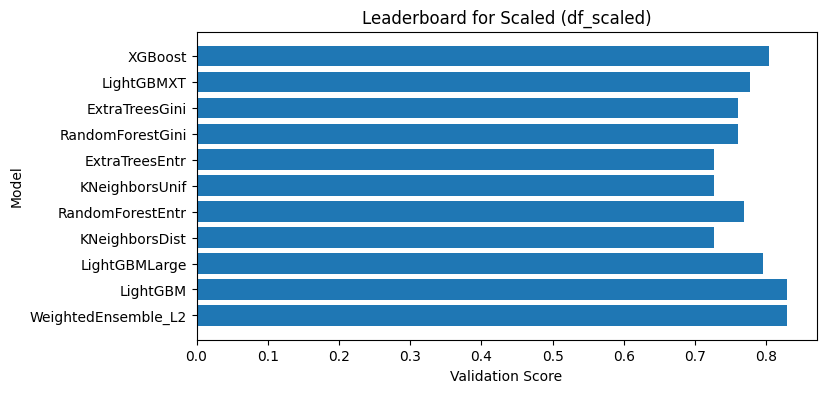

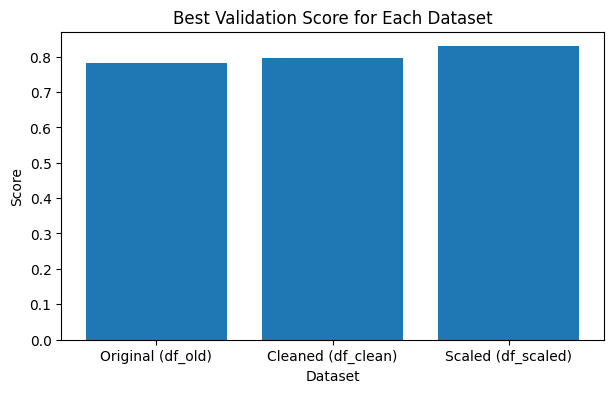

In [ ]:
# 3. Put all datasets in a dictionary for iteration
TARGET = 'Outcome'
TEST_FRACTION = 0.2
datasets = {
    'Original (df_old)': df_old,
    'Cleaned (df_clean)': df,
    'Scaled (df_scaled)': df_scaled
}

# 4. -- Train a separate predictor for each dataset and collect leaderboards --
predictors = {}
leaderboards = {}

for name, data in datasets.items():
    # a) Split the dataset into training and test subsets
    df_train = data.sample(frac=1 - TEST_FRACTION, random_state=42)
    df_test = data.drop(df_train.index)

    # b) Train a new AutoGluon TabularPredictor
    predictor = TabularPredictor(label=TARGET).fit(df_train, presets='medium_quality')
    #medium_quality: This preset is recommended for moderate dataset sizes (up to 30k rows) and will result in faster runtimes.
    predictors[name] = predictor

    # c) Evaluate the predictor and retrieve the leaderboard
    leaderboard = predictor.leaderboard(df_test, silent=True)
    leaderboards[name] = leaderboard

    # d) Print the unique leaderboard for this dataset
    print(f"Leaderboard for {name}:")
    print(leaderboard)
    print("-" * 70)

    # e) Plot this dataset's leaderboard
    #    We'll use a horizontal bar plot of 'score_val' by 'model'
    plt.figure(figsize=(8, 4))
    plt.barh(leaderboard['model'], leaderboard['score_val'])
    plt.xlabel('Validation Score')
    plt.ylabel('Model')
    plt.title(f'Leaderboard for {name}')
    plt.gca().invert_yaxis()  # So top model is at the top
    plt.show()

# 5. -- (Optional) Compare the best scores across datasets in a separate bar chart --
best_scores = {}
for name, lb in leaderboards.items():
    best_scores[name] = lb['score_val'].max()

plt.figure(figsize=(7, 4))
plt.bar(best_scores.keys(), best_scores.values())
plt.title('Best Validation Score for Each Dataset')
plt.xlabel('Dataset')
plt.ylabel('Score')
plt.show()

### Show the feature importance table
The TabularPredictor class from Autogluon also provides a function "feature_importance"

No path specified. Models will be saved in: "AutogluonModels/ag-20250320_135117"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.9.21
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.2.0: Fri Dec  6 19:01:59 PST 2024; root:xnu-11215.61.5~2/RELEASE_ARM64_T6000
CPU Count:          8
Memory Avail:       4.68 GB / 16.00 GB (29.3%)
Disk Space Avail:   14.61 GB / 460.43 GB (3.2%)
Presets specified: ['medium_quality']
Beginning AutoGluon training ...
AutoGluon will save models to "/Users/chrisoesterreich/Desktop/AppliedAnalytics/Applied-Analytics/04_Thursday/AutogluonModels/ag-20250320_135117"
Train Data Rows:    614
Train Data Columns: 8
Label Column:       Outcome
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually spec


Leaderboard for Original (df_old):
                  model  score_test  score_val eval_metric  pred_time_test  \
0            LightGBMXT    0.766234   0.772358    accuracy        0.005701   
1         LightGBMLarge    0.746753   0.764228    accuracy        0.006939   
2        ExtraTreesGini    0.746753   0.723577    accuracy        0.034515   
3      RandomForestGini    0.740260   0.739837    accuracy        0.033130   
4      RandomForestEntr    0.733766   0.731707    accuracy        0.033115   
5              LightGBM    0.727273   0.780488    accuracy        0.001537   
6   WeightedEnsemble_L2    0.727273   0.780488    accuracy        0.002671   
7               XGBoost    0.727273   0.723577    accuracy        0.004915   
8        ExtraTreesEntr    0.727273   0.731707    accuracy        0.034327   
9        KNeighborsUnif    0.688312   0.682927    accuracy        0.013994   
10       KNeighborsDist    0.688312   0.674797    accuracy        0.014898   

    pred_time_val  fit_time

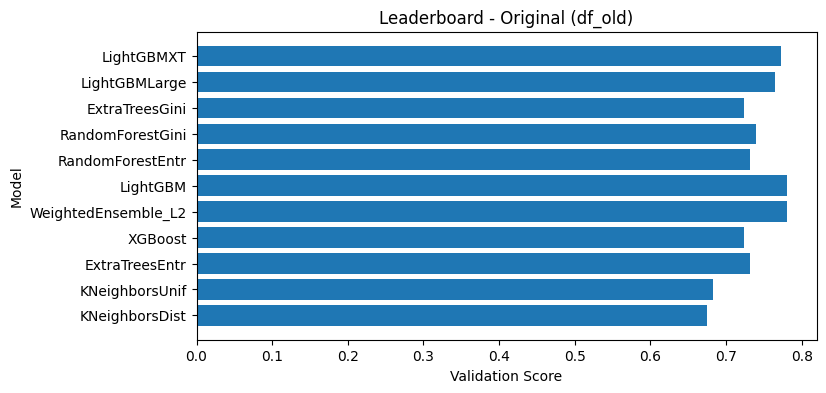

Computing feature importance via permutation shuffling for 8 features using 614 rows with 5 shuffle sets...
	0.18s	= Expected runtime (0.04s per shuffle set)
	0.06s	= Actual runtime (Completed 5 of 5 shuffle sets)



Feature Importance for Original (df_old):
                          importance    stddev   p_value  n  p99_high  \
Glucose                     0.182410  0.010301  0.000001  5  0.203619   
BMI                         0.087948  0.010106  0.000021  5  0.108755   
Age                         0.065798  0.007155  0.000017  5  0.080530   
DiabetesPedigreeFunction    0.039088  0.011913  0.000919  5  0.063616   
BloodPressure               0.030293  0.006159  0.000194  5  0.042974   
Pregnancies                 0.025407  0.006575  0.000493  5  0.038946   
Insulin                     0.018893  0.003175  0.000092  5  0.025430   
SkinThickness               0.010749  0.000892  0.000006  5  0.012586   

                           p99_low  
Glucose                   0.161201  
BMI                       0.067140  
Age                       0.051066  
DiabetesPedigreeFunction  0.014560  
BloodPressure             0.017612  
Pregnancies               0.011868  
Insulin                   0.012355  
Ski

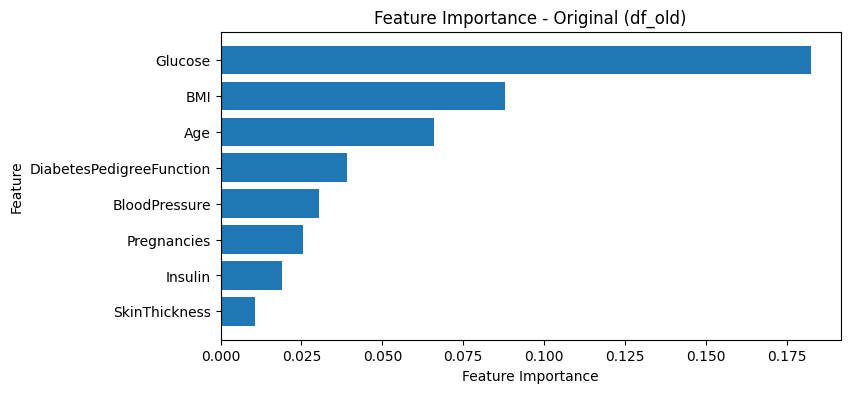


First few predictions for Original (df_old):
    Outcome  Predicted
1         0          0
4         1          1
13        1          1
14        1          1
20        0          0
----------------------------------------------------------------------

Leaderboard for Cleaned (df_clean):
                  model  score_test  score_val eval_metric  pred_time_test  \
0               XGBoost    0.760274   0.794872    accuracy        0.005060   
1            LightGBMXT    0.746575   0.794872    accuracy        0.004080   
2   WeightedEnsemble_L2    0.746575   0.794872    accuracy        0.005329   
3        ExtraTreesGini    0.739726   0.760684    accuracy        0.035024   
4        ExtraTreesEntr    0.732877   0.726496    accuracy        0.033068   
5      RandomForestGini    0.732877   0.760684    accuracy        0.034746   
6      RandomForestEntr    0.726027   0.760684    accuracy        0.048742   
7        KNeighborsUnif    0.712329   0.786325    accuracy        0.060559   
8     

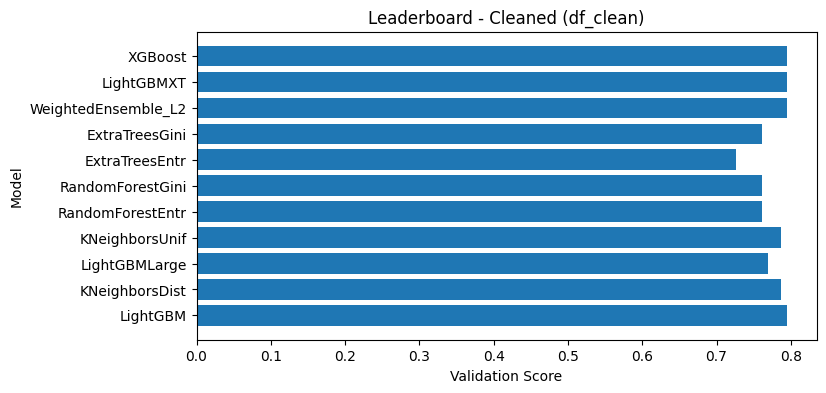

Computing feature importance via permutation shuffling for 8 features using 583 rows with 5 shuffle sets...
	0.16s	= Expected runtime (0.03s per shuffle set)
	0.05s	= Actual runtime (Completed 5 of 5 shuffle sets)



Feature Importance for Cleaned (df_clean):
                          importance    stddev   p_value  n  p99_high  \
Glucose                     0.115266  0.009028  0.000004  5  0.133854   
Age                         0.018525  0.002544  0.000042  5  0.023763   
SkinThickness               0.018182  0.006486  0.001653  5  0.031537   
BMI                         0.013379  0.006113  0.004039  5  0.025965   
DiabetesPedigreeFunction    0.012693  0.004942  0.002277  5  0.022868   
Insulin                     0.012007  0.004697  0.002318  5  0.021679   
Pregnancies                 0.007890  0.003116  0.002398  5  0.014306   
BloodPressure               0.002401  0.002301  0.039980  5  0.007140   

                           p99_low  
Glucose                   0.096678  
Age                       0.013286  
SkinThickness             0.004826  
BMI                       0.000793  
DiabetesPedigreeFunction  0.002518  
Insulin                   0.002335  
Pregnancies               0.001474  
Bl

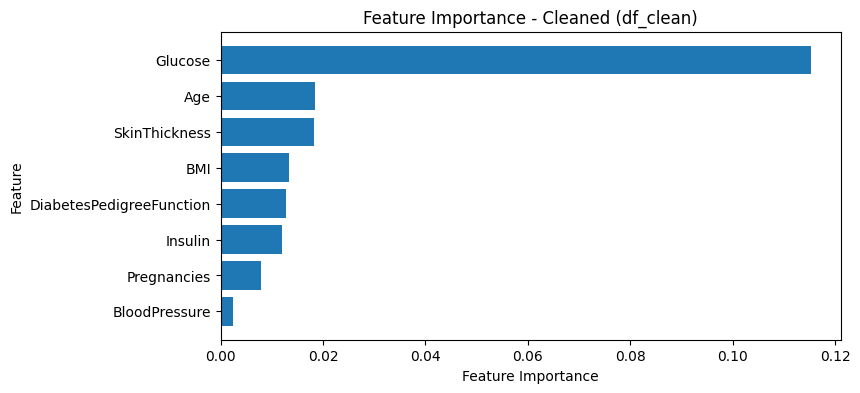


First few predictions for Cleaned (df_clean):
    Outcome  Predicted
1       0.0        0.0
4       0.0        0.0
13      1.0        0.0
14      0.0        0.0
20      1.0        1.0
----------------------------------------------------------------------

Leaderboard for Scaled (df_scaled):
                  model  score_test  score_val eval_metric  pred_time_test  \
0               XGBoost    0.767123   0.803419    accuracy        0.005050   
1            LightGBMXT    0.760274   0.777778    accuracy        0.001061   
2        ExtraTreesGini    0.739726   0.760684    accuracy        0.042257   
3        ExtraTreesEntr    0.732877   0.726496    accuracy        0.032868   
4      RandomForestGini    0.732877   0.760684    accuracy        0.033759   
5        KNeighborsUnif    0.726027   0.726496    accuracy        0.014852   
6      RandomForestEntr    0.726027   0.769231    accuracy        0.031691   
7        KNeighborsDist    0.719178   0.726496    accuracy        0.014979   
8    

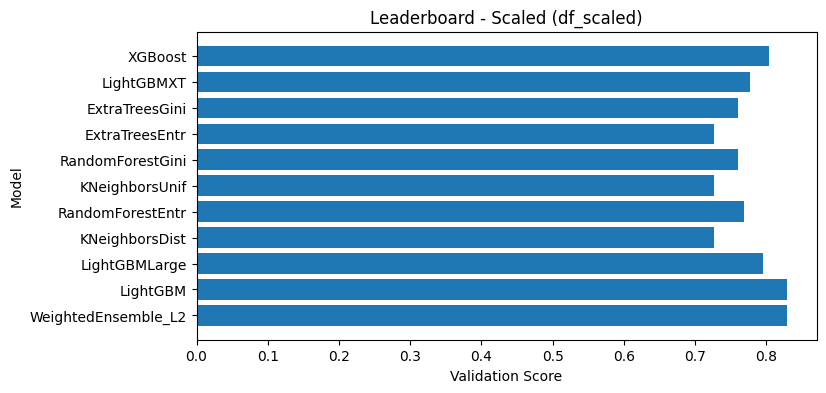

Computing feature importance via permutation shuffling for 8 features using 583 rows with 5 shuffle sets...
	0.77s	= Expected runtime (0.15s per shuffle set)
	0.31s	= Actual runtime (Completed 5 of 5 shuffle sets)



Feature Importance for Scaled (df_scaled):
                          importance    stddev       p_value  n  p99_high  \
Glucose                     0.164322  0.007990  6.687607e-07  5  0.180775   
BMI                         0.067238  0.003719  1.118056e-06  5  0.074895   
DiabetesPedigreeFunction    0.054545  0.008525  6.931922e-05  5  0.072098   
Age                         0.046312  0.001715  2.253888e-07  5  0.049844   
Insulin                     0.039451  0.007378  1.401617e-04  5  0.054642   
SkinThickness               0.033276  0.002601  4.445284e-06  5  0.038632   
BloodPressure               0.025043  0.003344  3.724638e-05  5  0.031928   
Pregnancies                 0.010292  0.001715  8.926066e-05  5  0.013823   

                           p99_low  
Glucose                   0.147870  
BMI                       0.059582  
DiabetesPedigreeFunction  0.036993  
Age                       0.042780  
Insulin                   0.024260  
SkinThickness             0.027920  
Blo

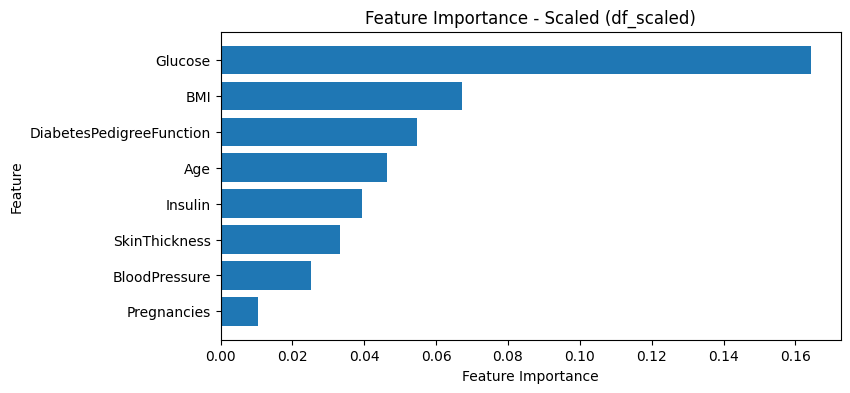


First few predictions for Scaled (df_scaled):
    Outcome  Predicted
1       0.0        0.0
4       0.0        0.0
13      1.0        1.0
14      0.0        1.0
20      1.0        1.0
----------------------------------------------------------------------


In [19]:
# 3. For each dataset, create train/test split, fit predictor
# ------------------------------------------------------------------
predictors = {}
dfs_train = {}
dfs_test = {}

for name, data in datasets.items():
    # a) Train/Test Split
    df_train = data.sample(frac=1 - TEST_FRACTION, random_state=42)
    df_test = data.drop(df_train.index)
    
    # b) Fit AutoGluon
    predictor = TabularPredictor(label=TARGET).fit(df_train, presets='medium_quality')
    
    # c) Store references for later
    predictors[name] = predictor
    dfs_train[name] = df_train
    dfs_test[name] = df_test

# ------------------------------------------------------------------
# 4. Plot & print the leaderboard, feature importance, and predictions
# ------------------------------------------------------------------
for name in datasets.keys():
    predictor = predictors[name]
    df_train = dfs_train[name]
    df_test = dfs_test[name]
    
    # 4a. Print and plot the leaderboard for each dataset
    leaderboard = predictor.leaderboard(df_test, silent=True)
    print(f"\nLeaderboard for {name}:")
    print(leaderboard)

    plt.figure(figsize=(8, 4))
    plt.barh(leaderboard['model'], leaderboard['score_val'])
    plt.xlabel('Validation Score')
    plt.ylabel('Model')
    plt.title(f'Leaderboard - {name}')
    plt.gca().invert_yaxis()
    plt.show()

    # 4b. Show & plot feature importance
    feature_importance = predictor.feature_importance(df_train)
    print(f"\nFeature Importance for {name}:")
    print(feature_importance)

    plt.figure(figsize=(8, 4))
    plt.barh(feature_importance.index, feature_importance['importance'])
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title(f'Feature Importance - {name}')
    plt.gca().invert_yaxis()
    plt.show()

    # 4c. Make predictions on the test set
    y_pred = predictor.predict(df_test.drop(columns=[TARGET]))
    predictions = df_test[[TARGET]].copy()
    predictions['Predicted'] = y_pred

    print(f"\nFirst few predictions for {name}:")
    print(predictions.head())

    print("-" * 70)